In [1]:
import os
os.chdir("C:/Users/86153/Desktop/神经网络设计Ⅱ/实验/isic2018")
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from utils import ISIC2018Dataset, draw_samples
print(os.getcwd())

C:\Users\86153\Desktop\神经网络设计Ⅱ\实验\isic2018


<AxesSubplot:title={'center':'isic2018 training set with 7511 samples'}, xlabel='categories'>

<AxesSubplot:title={'center':'isic2018 validation set with 193 samples'}, xlabel='categories'>

<AxesSubplot:title={'center':'isic2018 testing set with 2504 samples'}, xlabel='categories'>

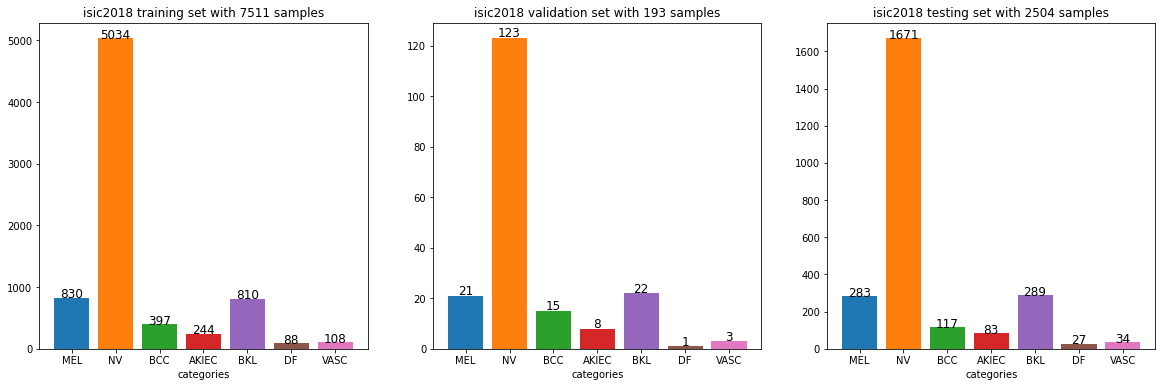

In [2]:
train_dataset = ISIC2018Dataset(
    csv_file_path='./data/ISIC2018/Train_GroundTruth.csv',
    img_dir='./data/ISIC2018/ISIC2018_Task3_Training_Input'
)
valid_dataset = ISIC2018Dataset(
    csv_file_path='./data/ISIC2018/ISIC2018_Task3_Validation_GroundTruth.csv',
    img_dir='./data/ISIC2018/ISIC2018_Task3_Validation_Input'
)
test_dataset = ISIC2018Dataset(
    csv_file_path='./data/ISIC2018/Test_GroundTruth.csv',
    img_dir='./data/ISIC2018/ISIC2018_Task3_Training_Input'
)

train_count = train_dataset.count_samples()
valid_count = valid_dataset.count_samples()
test_count = test_dataset.count_samples()

def draw_bar(ax, data, title):
    for i in range(len(data)):
        ax.bar(data[i][0], data[i][1])
        ax.text(data[i][0], data[i][1]+0.5, f"{data[i][1]}", ha='center', fontsize=12)
    ax.set_xlabel("categories")
    ax.set_title(title)
    return ax

fig, axes = plt.subplots(1, 3, facecolor='w', figsize=(20, 6))
axes = axes.flat
draw_bar(axes[0], train_count, f"isic2018 training set with {len(train_dataset)} samples")
draw_bar(axes[1], valid_count, f"isic2018 validation set with {len(valid_dataset)} samples")
draw_bar(axes[2], test_count, f"isic2018 testing set with {len(test_dataset)} samples")
plt.show()

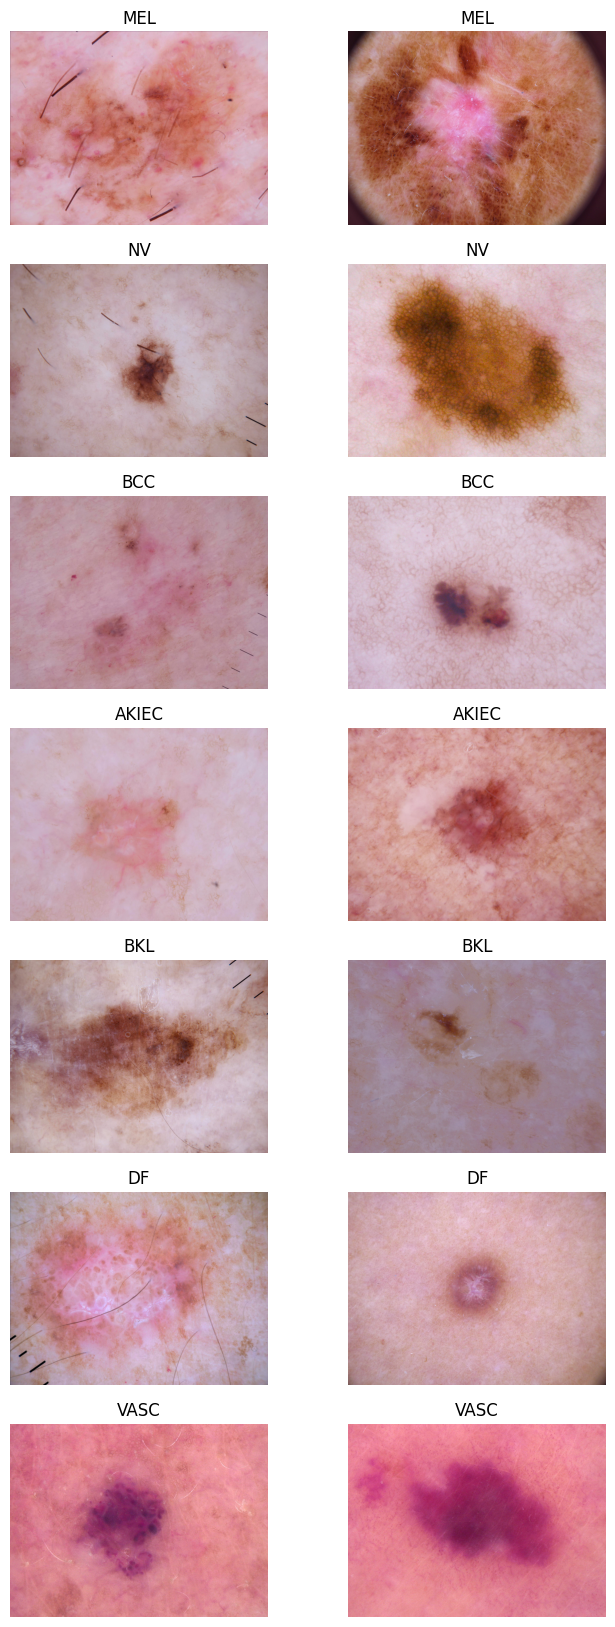

In [4]:
images, labels = [], []
for cls in range(train_dataset.num_classes):
    img_idx = train_dataset.targets.index(cls)
    img, target  = train_dataset[img_idx]
    images.append(img)
    labels.append(train_dataset.target_to_label[target])

    img_idx = train_dataset.targets.index(cls, img_idx+1)
    img, target  = train_dataset[img_idx]
    images.append(img)
    labels.append(train_dataset.target_to_label[target])

fig, axes = draw_samples(images, labels, 7, 2)
plt.show()